# Seoul Bike Sharing Demand Trend Analysis

## Problem Statement

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [5]:
# Read Data
bike_sharing_data = pd.read_csv(r"D:\LEARNING 365 Days\seoul+bike+sharing+demand\SeoulBikeData.csv", encoding="latin1")
bike_sharing_data.columns = bike_sharing_data.columns.str.title()

bike_sharing_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind Speed (M/S),Visibility (10M),Dew Point Temperature(°C),Solar Radiation (Mj/M2),Rainfall(Mm),Snowfall (Cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Handling Missing Value

In [6]:
# Check Missing Value
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind Speed (M/S)           8760 non-null   float64
 6   Visibility (10M)           8760 non-null   int64  
 7   Dew Point Temperature(°C)  8760 non-null   float64
 8   Solar Radiation (Mj/M2)    8760 non-null   float64
 9   Rainfall(Mm)               8760 non-null   float64
 10  Snowfall (Cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
# Check Missing Value
bike_sharing_data.isna().sum()/len(bike_sharing_data)*100

Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind Speed (M/S)             0.0
Visibility (10M)             0.0
Dew Point Temperature(°C)    0.0
Solar Radiation (Mj/M2)      0.0
Rainfall(Mm)                 0.0
Snowfall (Cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

There are no missing values

## Handling Duplicate Value

In [8]:
# Check Duplicates
bike_sharing_data.duplicated().sum()

np.int64(0)

There are no duplicates data

## Handling Outlier

In [9]:
# Check Outliers
bike_sharing_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind Speed (M/S),Visibility (10M),Dew Point Temperature(°C),Solar Radiation (Mj/M2),Rainfall(Mm),Snowfall (Cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


There are some columns that are suspected to have outliers

In [10]:
# List the numerical columns
numerical_columns = [
    "Rented Bike Count",
    "Hour",
    "Temperature(°C)",
    "Humidity(%)",
    "Wind Speed (M/S)",
    "Visibility (10M)",
    "Dew Point Temperature(°C)",
    "Solar Radiation (Mj/M2)",
    "Rainfall(Mm)",
    "Snowfall (Cm)"
]

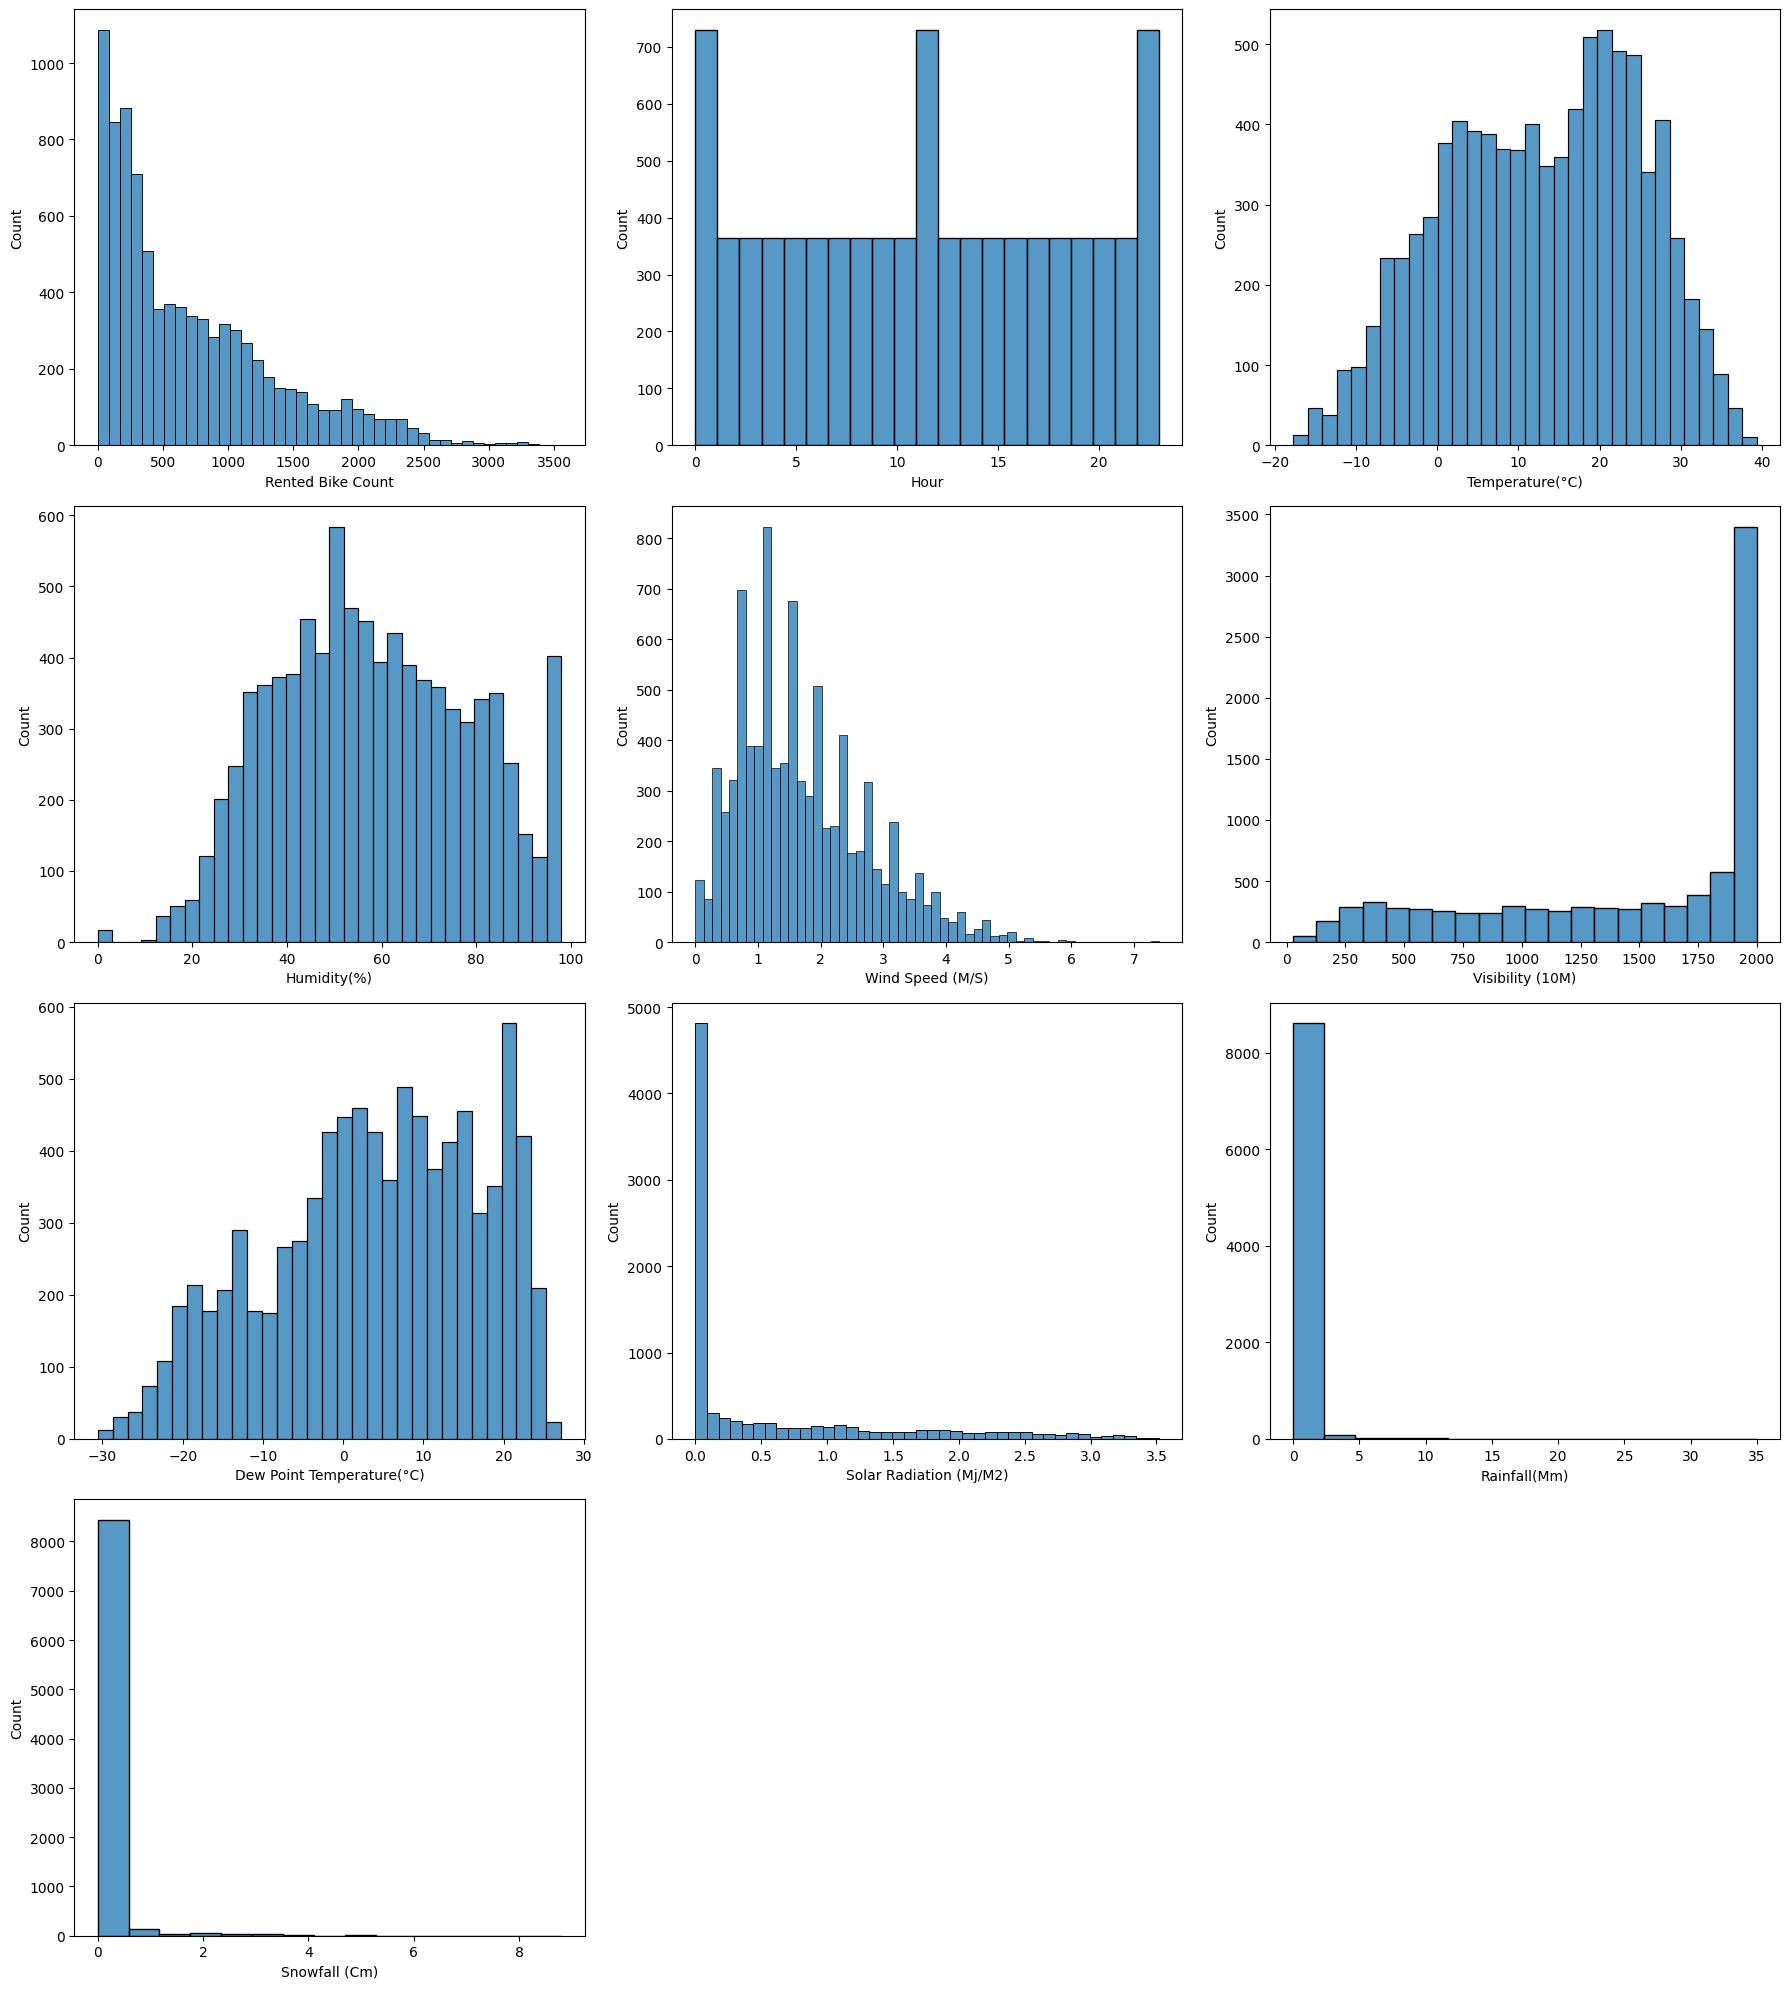

In [11]:
# Visualize the distribution of numerical data
n = len(numerical_columns)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)
    
    # Visualize histogram
    sns.histplot(data = bike_sharing_data, x = col)
    
plt.tight_layout()
plt.show()

Some columns have skewed distribution: Rented Bike Count, Wind Speed (M/S), Visibility (10M), Solar Radiation (Mj/M2).

Rainfall(Mm) and Snowfall(Cm) have single majority value.

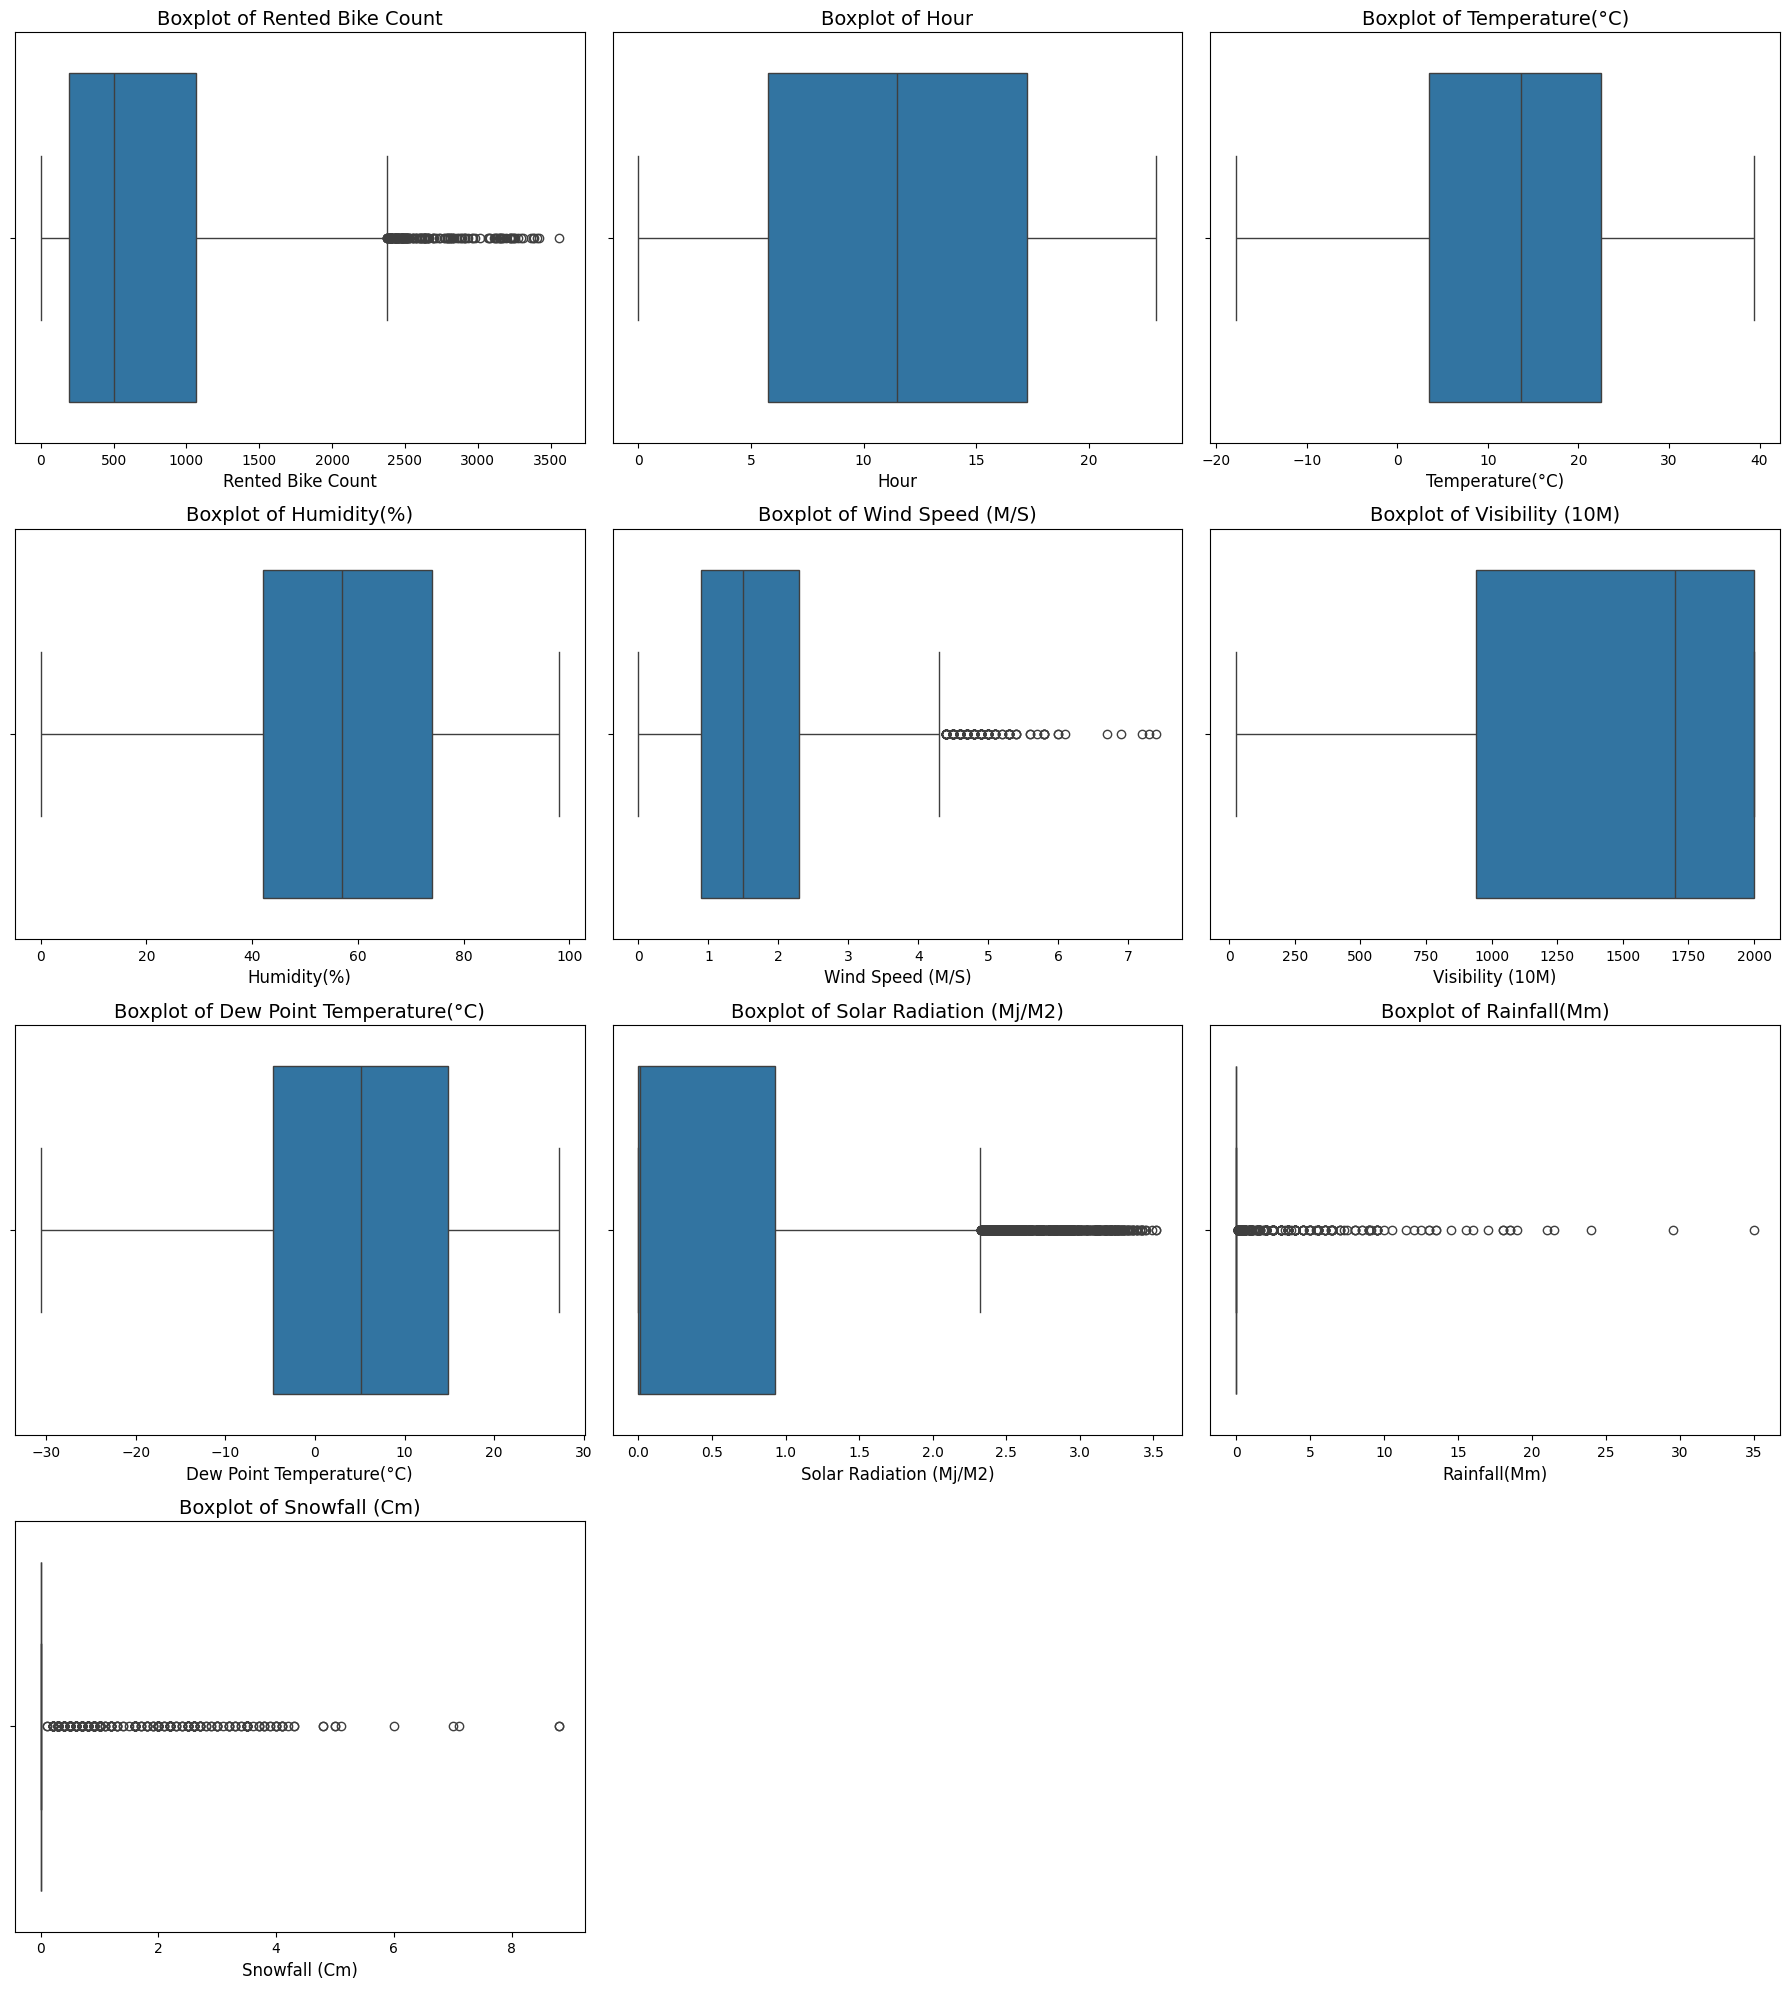

In [12]:
# Visualize the distribution of numerical data
n = len(numerical_columns)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize = (18, 5 * rows))

for i, col in enumerate(numerical_columns):
    ax = axes.flatten()[i]
    
    # Visualize boxplot
    sns.boxplot(data = bike_sharing_data, x = col, ax=ax)

    ax.set_title(f"Boxplot of {col}", fontsize = 14)
    ax.set_xlabel(col, fontsize = 12)

for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flatten()[j])
    
plt.tight_layout()
plt.show()

Rented Bike Count, Wind Speed (M/S), Solar Radiation (Mj/M2) columns have outliers. As this is only descriptive analysis, those outliers will be removed.

## Data Wrangling & Feature Engineering

In [13]:
# Change Date format from object to datetime
bike_sharing_data["Date"] = pd.to_datetime(bike_sharing_data["Date"], dayfirst = True)
print(bike_sharing_data.dtypes)

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind Speed (M/S)                    float64
Visibility (10M)                      int64
Dew Point Temperature(°C)           float64
Solar Radiation (Mj/M2)             float64
Rainfall(Mm)                        float64
Snowfall (Cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object


In [14]:
## Extract date information from Date
bike_sharing_data["Year"] = bike_sharing_data["Date"].dt.year
bike_sharing_data["Month"] = bike_sharing_data["Date"].dt.month
bike_sharing_data["DayofWeek"] = bike_sharing_data["Date"].dt.dayofweek
bike_sharing_data["Day"] = bike_sharing_data["Date"].dt.day

bike_sharing_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind Speed (M/S),Visibility (10M),Dew Point Temperature(°C),Solar Radiation (Mj/M2),Rainfall(Mm),Snowfall (Cm),Seasons,Holiday,Functioning Day,Year,Month,DayofWeek,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,4,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,4,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,4,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,4,30


In [15]:
# Check range of Date
min(bike_sharing_data.Date), max(bike_sharing_data.Date)

(Timestamp('2017-12-01 00:00:00'), Timestamp('2018-11-30 00:00:00'))

## Exploratory Data Analysis

### 1. Analyze bike-rented trend based on times

#### Seasonal Trends in Monthly Bike Rentals

In [132]:
# Group data based on Month and Seasons
Month = pd.DataFrame(bike_sharing_data.groupby(["Month","Seasons"])["Rented Bike Count"].sum())
Month

,,Rented Bike Count
Month,Seasons,
1,Winter,150006
2,Winter,151833
3,Spring,380594
4,Spring,524227
5,Spring,707088
6,Summer,896887
7,Summer,734460
8,Summer,651887
9,Autumn,673612


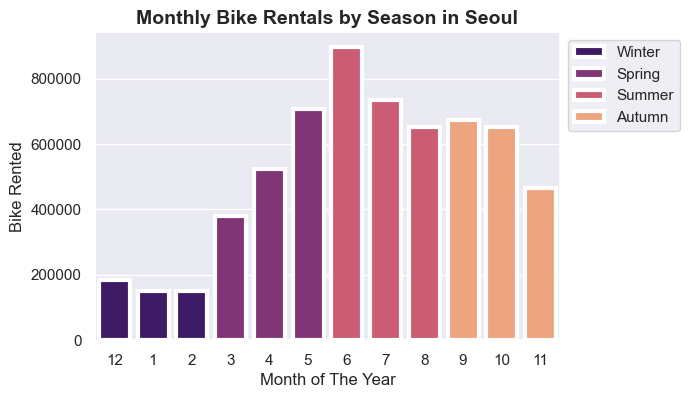

In [133]:
# Visualize the grouped data
order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

sns.set_style("darkgrid")
sns.set(rc = {"figure.figsize": (6,4)})
ax = sns.barplot(data = Month, x = "Month", y = "Rented Bike Count", hue = "Seasons", order = order, palette = "magma", legend = "full", lw = 3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title("Monthly Bike Rentals by Season in Seoul", fontsize=14, fontweight="bold")
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("Bike Rented")
plt.xlabel("Month of The Year")
plt.show()

#### Seasonal Trends in Daily Bike Rentals

In [134]:
# Group data based on Day of Week and Seasons
daily = pd.DataFrame(bike_sharing_data.groupby(["DayofWeek","Seasons"])["Rented Bike Count"].mean())
daily

Rented Bike Count
DayofWeek Seasons                   
0         Autumn          958.801282
          Spring          809.233974
          Summer          924.458333
          Winter          229.759615
1         Autumn          677.413462
          Spring          814.589744
          Summer         1013.733974
          Winter          246.173077
2         Autumn          934.785256
          Spring          717.256410
          Summer         1087.128205
          Winter          222.227564
3         Autumn          837.480769
          Spring          607.922619
          Summer         1048.128205
          Winter          241.065972
4         Autumn          723.612179
          Spring          805.445513
          Summer         1165.354167
          Winter          261.887821
5         Autumn          848.455128
          Spring          721.400641
          Summer         1059.349359
          Winter          208.910256
6         Autumn          756.637821
          Spring          643.762821
          Summer          930.262821
          Winter          169.958333

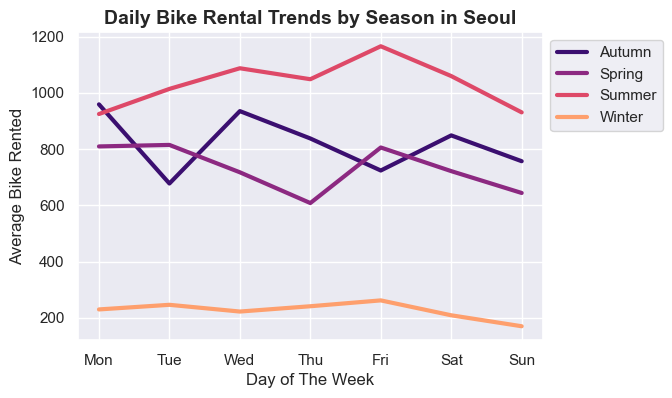

In [135]:
# Visualize the grouped data
sns.set_style("darkgrid")
sns.set(rc = {"figure.figsize": (6,4)})
ax = sns.lineplot (data = daily, x = "DayofWeek", y = "Rented Bike Count",
                   hue = "Seasons", palette = "magma",
                   legend = "full", lw = 3)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

plt.title("Daily Bike Rental Trends by Season in Seoul", fontsize=14, fontweight="bold")
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("Average Bike Rented")
plt.xlabel("Day of The Week")
plt.show()

#### Seasonal Trends in Hour Bike Rentals

In [136]:
## 1.c Seasonal Trends in Hour Bike Rentals
### Group data based on Hour and Seasons
hourly = pd.DataFrame(bike_sharing_data.groupby(["Hour","Seasons"])["Rented Bike Count"].mean())
hourly

Rented Bike Count
Hour Seasons                   
0    Autumn          623.681319
     Spring          470.630435
     Summer          899.065217
     Winter          165.177778
1    Autumn          485.714286
...                         ...
22   Winter          225.133333
23   Autumn          737.659341
     Spring          609.413043
     Summer         1153.902174
     Winter          173.433333

[96 rows x 1 columns]

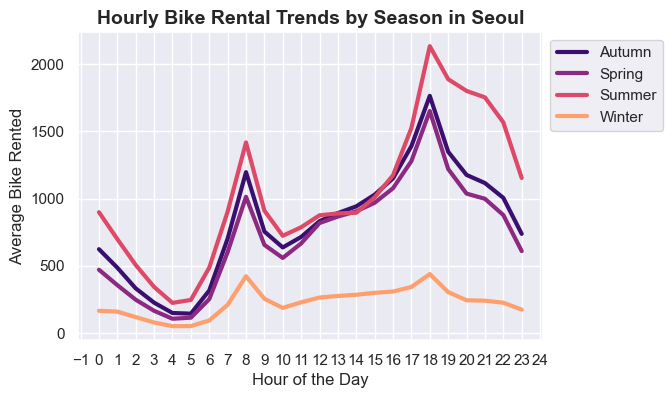

In [137]:
# Visualize the grouped data
sns.set_style("darkgrid")
sns.set(rc = {"figure.figsize": (6,4)})
ax = sns.lineplot (data = hourly, x = "Hour", y = "Rented Bike Count",
                   hue = "Seasons", palette = "magma",
                   legend = "full", lw = 3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title("Hourly Bike Rental Trends by Season in Seoul", fontsize=14, fontweight= "bold")
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("Average Bike Rented")
plt.xlabel("Hour of the Day")
plt.show()

#### Holiday Trends in Hour Bike Rentals

In [138]:
# Group data based on Hour and Holiday
hourly_2 = pd.DataFrame(bike_sharing_data.groupby(["Hour","Holiday"])["Rented Bike Count"].mean())
hourly_2

Rented Bike Count
Hour Holiday                      
0    Holiday            466.166667
     No Holiday         545.365994
1    Holiday            393.333333
     No Holiday         427.887608
2    Holiday            303.888889
     No Holiday         301.512968
3    Holiday            212.333333
     No Holiday         202.864553
4    Holiday            128.388889
     No Holiday         132.809798
5    Holiday             89.000000
     No Holiday         141.680115
6    Holiday            132.833333
     No Holiday         295.590778
7    Holiday            214.277778
     No Holiday         626.325648
8    Holiday            348.500000
     No Holiday        1050.311239
9    Holiday            379.222222
     No Holiday         659.821326
10   Holiday            428.555556
     No Holiday         532.971182
11   Holiday            510.000000
     No Holiday         605.564841
12   Holiday            621.611111
     No Holiday         703.478386
13   Holiday            702.666667
     No Holiday         734.832853
14   Holiday            734.000000
     No Holiday         760.112392
15   Holiday            747.777778
     No Holiday         833.409222
16   Holiday            787.611111
     No Holiday         938.040346
17   Holiday            830.500000
     No Holiday        1154.487032
18   Holiday            800.666667
     No Holiday        1539.354467
19   Holiday            721.944444
     No Holiday        1219.694524
20   Holiday            713.777778
     No Holiday        1087.389049
21   Holiday            678.333333
     No Holiday        1049.766571
22   Holiday            596.833333
     No Holiday         939.706052
23   Holiday            451.944444
     No Holiday         682.495677

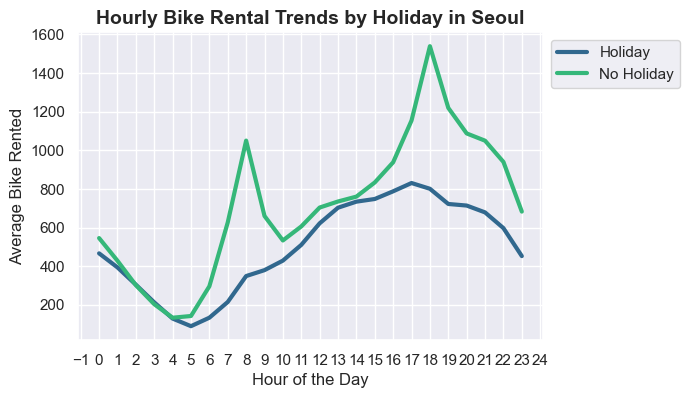

In [139]:
# Visualize the grouped data
sns.set_style("darkgrid")
sns.set(rc = {"figure.figsize": (6,4)})
ax = sns.lineplot (data = hourly_2, x = "Hour", y = "Rented Bike Count",
                   hue = "Holiday", palette = "viridis",
                   legend = "full", lw = 3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title("Hourly Bike Rental Trends by Holiday in Seoul", fontsize=14, fontweight= "bold")
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("Average Bike Rented")
plt.xlabel("Hour of the Day")
plt.show()

#### Day Status Trends in Hour Bike Rentals

In [140]:
# Identify Weekend and Weekdays
bike_sharing_data["day_status"] = bike_sharing_data.DayofWeek.map(lambda x: "Weekend" if (x == 5) | (x == 6) else "Weekdays")
bike_sharing_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind Speed (M/S),Visibility (10M),Dew Point Temperature(°C),Solar Radiation (Mj/M2),Seasons,Holiday,Functioning Day,Year,Month,DayofWeek,Day,day_status
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,Winter,No Holiday,Yes,2017,12,4,1,Weekdays
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,Winter,No Holiday,Yes,2017,12,4,1,Weekdays
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,Winter,No Holiday,Yes,2017,12,4,1,Weekdays
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,Winter,No Holiday,Yes,2017,12,4,1,Weekdays
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,Winter,No Holiday,Yes,2017,12,4,1,Weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,Autumn,No Holiday,Yes,2018,11,4,30,Weekdays
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,Autumn,No Holiday,Yes,2018,11,4,30,Weekdays
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,Autumn,No Holiday,Yes,2018,11,4,30,Weekdays
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,Autumn,No Holiday,Yes,2018,11,4,30,Weekdays


In [141]:
# Group data based on hour and day status
hourly_3 = pd.DataFrame(bike_sharing_data.groupby(["Hour","day_status"])["Rented Bike Count"].mean())
hourly_3

Rented Bike Count
Hour day_status                   
0    Weekdays           497.731801
     Weekend            651.201923
1    Weekdays           384.022989
     Weekend            531.990385
2    Weekdays           262.938697
     Weekend            398.730769
3    Weekdays           174.555556
     Weekend            275.548077
4    Weekdays           117.908046
     Weekend            169.442308
5    Weekdays           145.957854
     Weekend            121.826923
6    Weekdays           338.793103
     Weekend            159.000000
7    Weekdays           747.789272
     Weekend            250.182692
8    Weekdays          1255.977011
     Weekend            412.701923
9    Weekdays           704.344828
     Weekend            499.519231
10   Weekdays           521.670498
     Weekend            543.259615
11   Weekdays           589.218391
     Weekend            630.048077
12   Weekdays           673.268199
     Weekend            765.125000
13   Weekdays           678.973180
     Weekend            869.451923
14   Weekdays           693.754789
     Weekend            922.125000
15   Weekdays           759.954023
     Weekend           1002.932692
16   Weekdays           875.107280
     Weekend           1069.942308
17   Weekdays          1138.440613
     Weekend           1138.682692
18   Weekdays          1657.996169
     Weekend           1113.759615
19   Weekdays          1256.360153
     Weekend           1041.528846
20   Weekdays          1097.275862
     Weekend            997.913462
21   Weekdays          1061.061303
     Weekend            957.134615
22   Weekdays           954.927203
     Weekend            842.163462
23   Weekdays           678.747126
     Weekend            652.000000

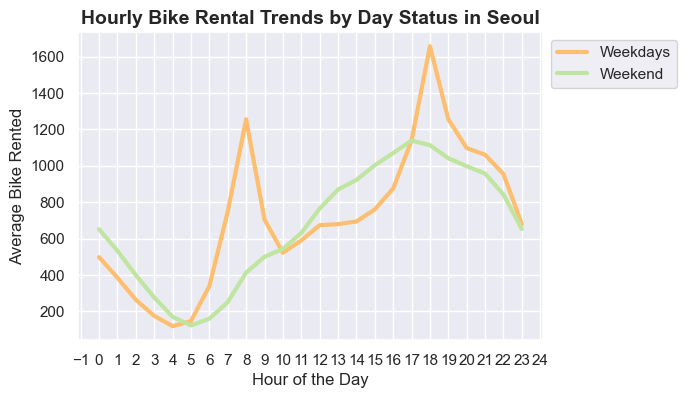

In [142]:
# Visualize the grouped data

sns.set_style("darkgrid")
sns.set(rc = {"figure.figsize": (6,4)})
ax = sns.lineplot (data = hourly_3, x = "Hour", y = "Rented Bike Count",
                   hue = "day_status", palette = "Spectral",
                   legend = "full", lw = 3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title("Hourly Bike Rental Trends by Day Status in Seoul", fontsize=14, fontweight= "bold")
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("Average Bike Rented")
plt.xlabel("Hour of the Day")
plt.show()

### 2 Analyze bike-rented trend correlation with weather condition

In [16]:
# List the weather condition variable columns
weather_columns = [
    "Temperature(°C)",
    "Humidity(%)",
    "Wind Speed (M/S)",
    "Visibility (10M)",
    "Dew Point Temperature(°C)",
    "Solar Radiation (Mj/M2)",
    "Rainfall(Mm)",
    "Snowfall (Cm)"
]

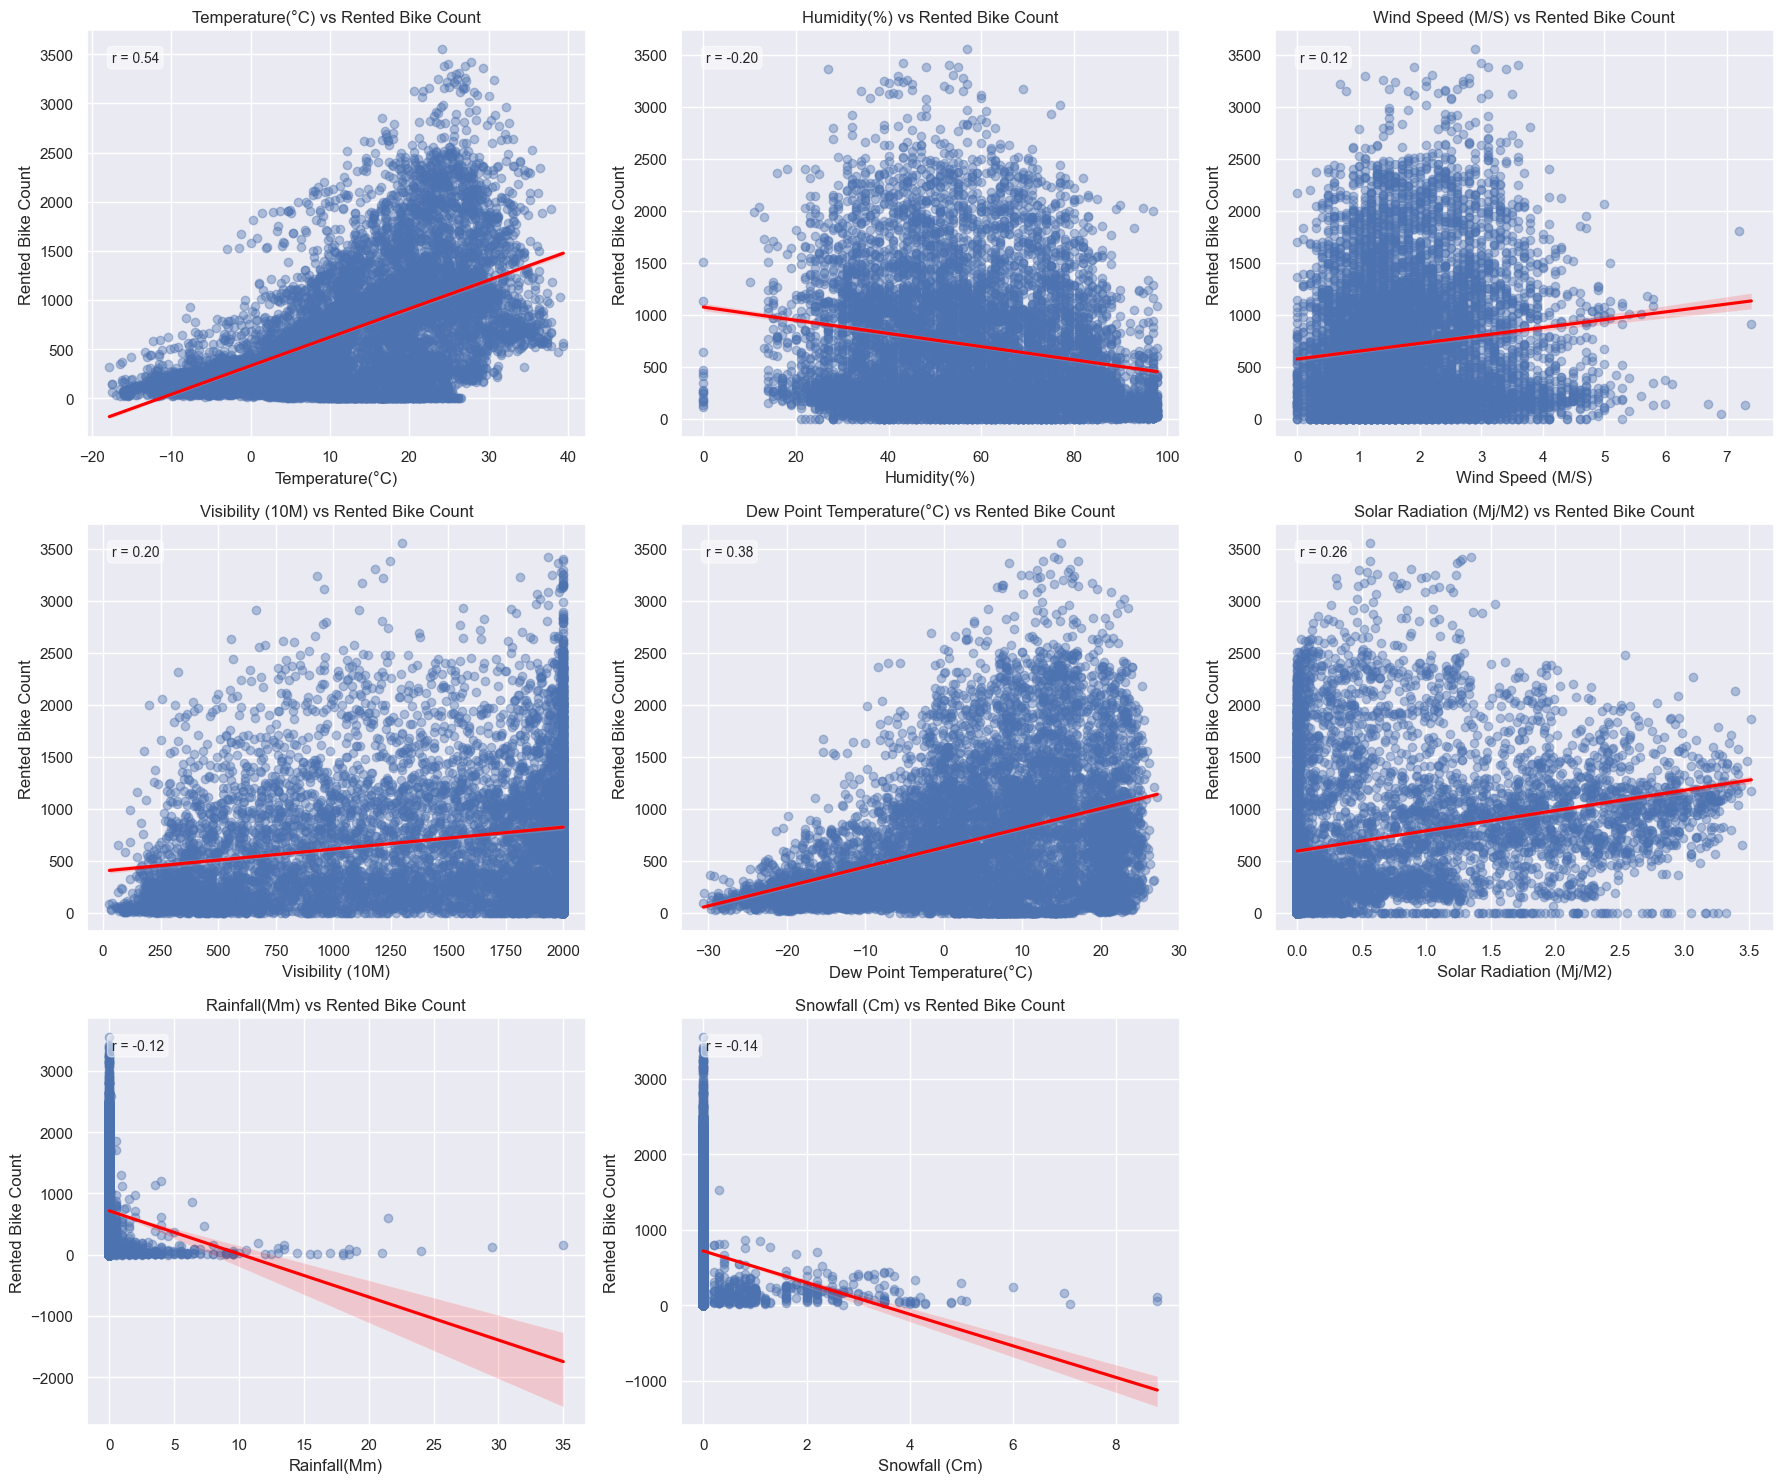

In [162]:
# Calculate and visualize the r correlation
n = len(weather_columns)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(weather_columns):
    plt.subplot(rows, cols, i + 1)
    
    # Plot scatter + regression line
    sns.regplot(data=bike_sharing_data, x=col, y="Rented Bike Count", scatter_kws={"alpha":0.4}, line_kws={"color":"red"})
    
    # Calculate Pearson Correlation
    r = bike_sharing_data[[col, "Rented Bike Count"]].corr().iloc[0, 1]
    
    # Add Correlation Value (r) in the left corner
    plt.text(0.05, 0.95, f"r = {r:.2f}", 
             transform=plt.gca().transAxes, 
             verticalalignment="top", 
             fontsize=10, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.5))
    
    plt.title(f"{col} vs Rented Bike Count")
    plt.xlabel(col)
    plt.ylabel("Rented Bike Count")

plt.tight_layout()
plt.show()

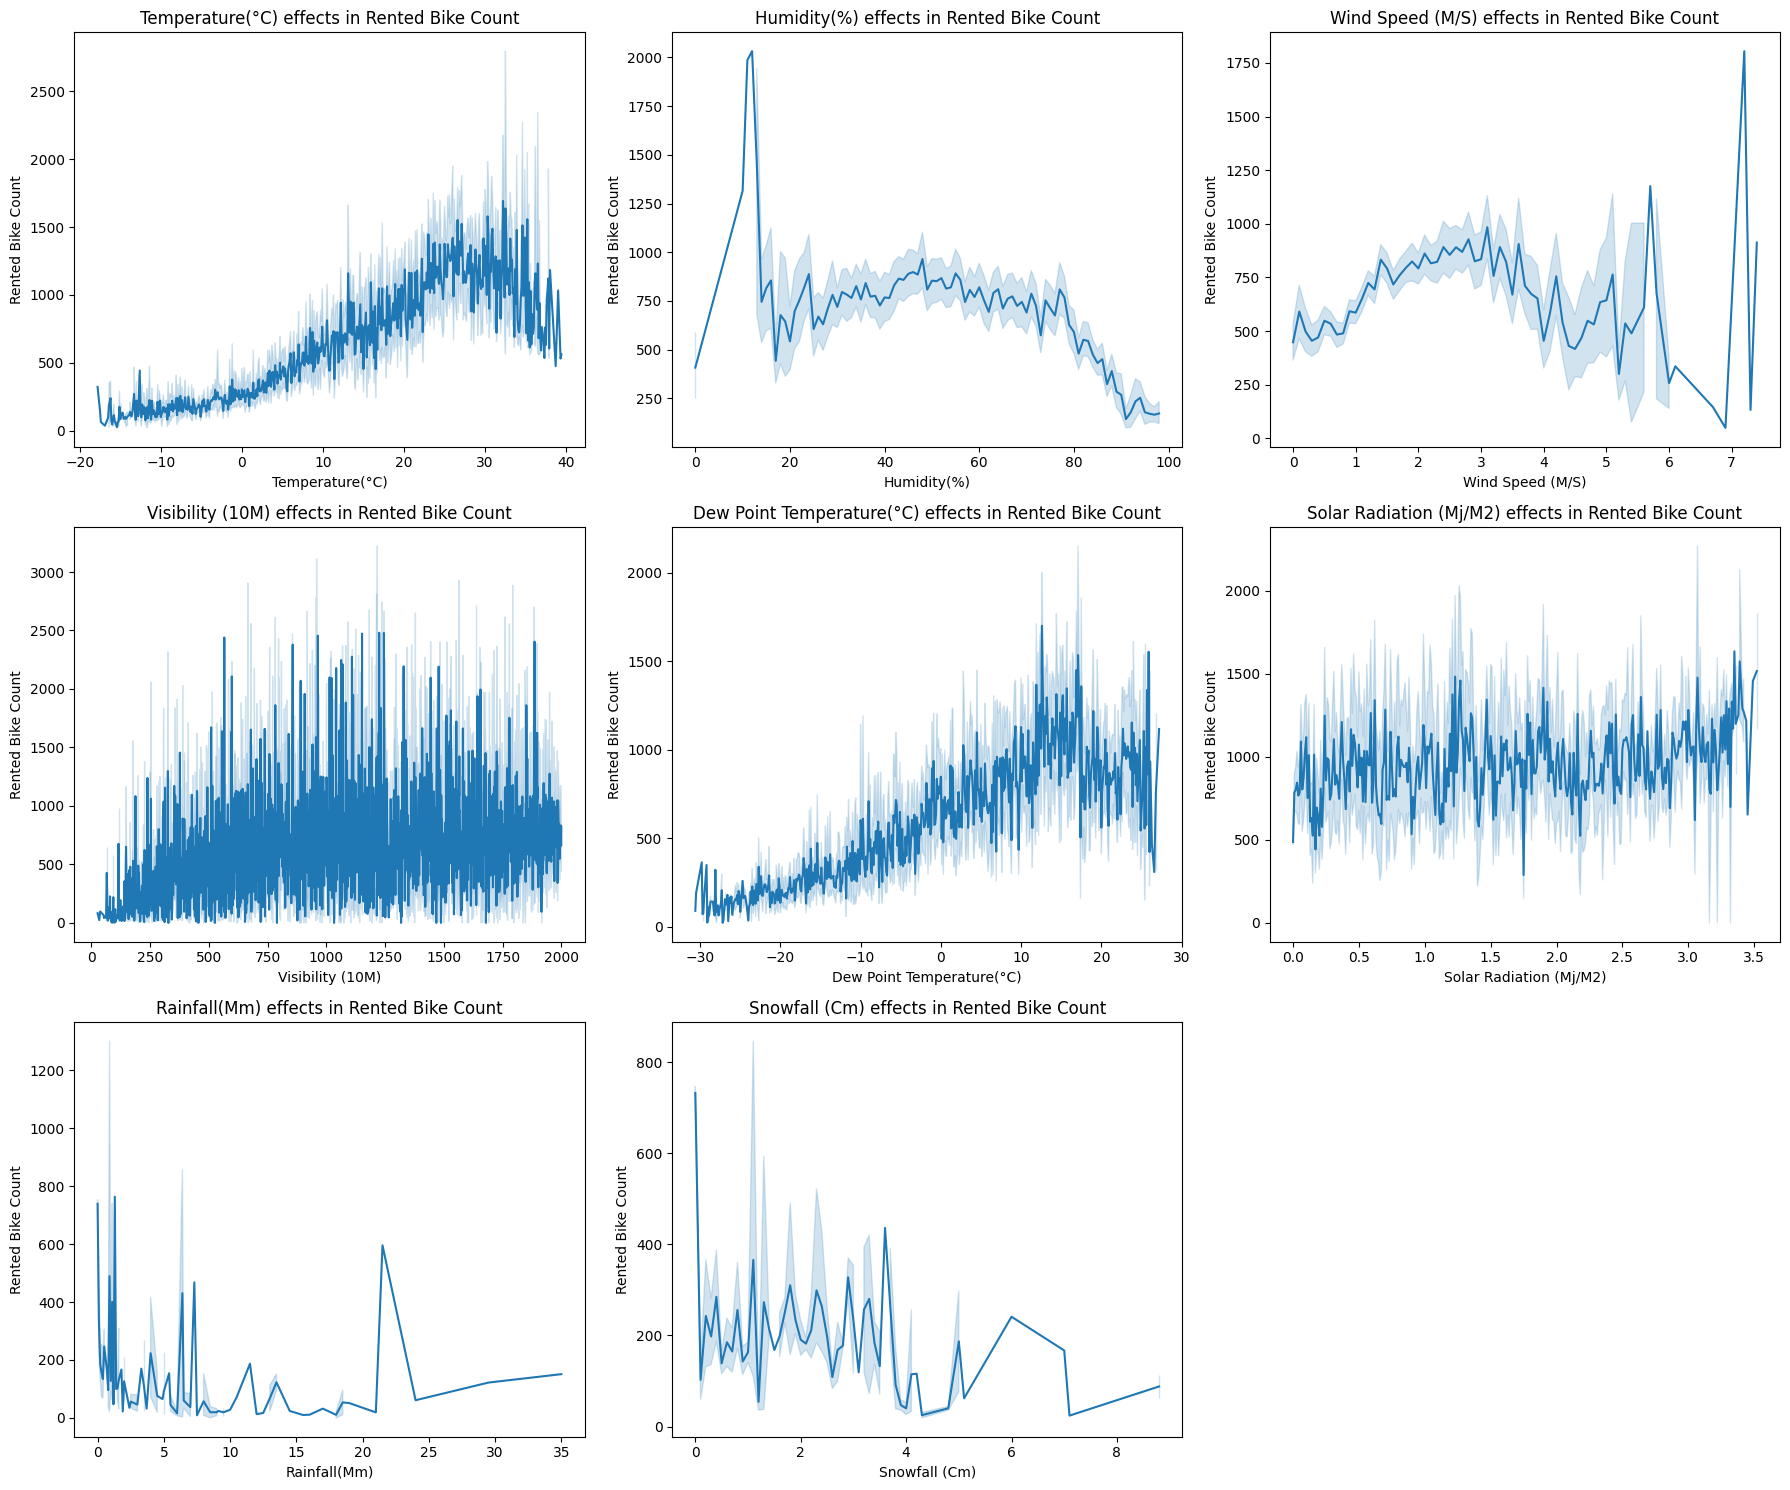

In [17]:
# Visualize weather condition effect in Rented Bike Count
n = len(weather_columns)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(weather_columns):
    plt.subplot(rows, cols, i + 1)
    
    # lineplot
    sns.lineplot(data=bike_sharing_data, x=col, y="Rented Bike Count")
    
    plt.title(f"{col} effects in Rented Bike Count")
    plt.xlabel(col)
    plt.ylabel("Rented Bike Count")

plt.tight_layout()
plt.show()